# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [7]:
import os
import nltk
import json
import pandas as pd
from path import Path
%matplotlib inline
from pandas.io.json import json_normalize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
# Read your api key environment variable
from newsapi.newsapi_client import NewsApiClient
api_key = os.getenv("NEWSAPI_KEY")

In [12]:
# Create a newsapi client
newsapi = NewsApiClient(api_key="d12a49a1d397437eb073e0ef21d19865")

In [13]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
#save json
with open('btc.json', 'w') as json_file:
    json.dump(btc_headlines, json_file)

In [14]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
#save json
with open('eth.json', 'w') as json_file:
    json.dump(eth_headlines, json_file)

In [16]:
# Create the Bitcoin sentiment scores DataFrame
#read in the json file
btc = pd.read_json ('btc.json')
#parse the json and load into a dataframe
btc_df = json_normalize(btc['articles'])
#drop all columns except for description
btc_df = btc_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = btc_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
btc_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
btc_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
btc_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
btc_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
btc_df

/var/folders/st/cys3nxcj1zd9p65l82tqzww80000gn/T/ipykernel_68339/3487334178.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  btc_df = json_normalize(btc['articles'])


description    Comp    Pos    Neu  \
0   Musk.MARK RALSTON/AFP via Getty Images\r\nElon...  0.3612  0.062  0.938   
1   The central Asian country became No. 2 in the ... -0.8047  0.000  0.704   
2   The Indian prime minister's account had a mess...  0.0000  0.000  1.000   
3   <table><tr><td></td></tr><tr><td>"Zhao Changpe...  0.5267  0.105  0.895   
4   The U.S. Securities and Exchange Commission ve...  0.5859  0.124  0.876   
..                                                ...     ...    ...    ...   
95  The coronavirus-driven digital transformation ...  0.4843  0.129  0.871   
96  If you’re looking for last-minute gift ideas, ...  0.8910  0.287  0.669   
97  Tired of gift cards? Here's how to give crypto...  0.3818  0.316  0.517   
98  Apple makes history, Tesla beats estimates on ...  0.4019  0.144  0.856   
99  Penny stocks aren't the only cheap assets to b...  0.1779  0.102  0.898   

      Neg  
0   0.000  
1   0.296  
2   0.000  
3   0.000  
4   0.000  
..    ...  
95  0.000  
96  0.044  
97  0.167  
98  0.000  
99  0.000  

[100 rows x 5 columns]

In [17]:
# Create the Ethereum sentiment scores DataFrame
#read in the json file
eth = pd.read_json ('eth.json')
#parse the json and load into a dataframe
eth_df = json_normalize(eth['articles'])
#drop all columns except for description
eth_df = eth_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = eth_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
eth_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
eth_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
eth_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
eth_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
eth_df

/var/folders/st/cys3nxcj1zd9p65l82tqzww80000gn/T/ipykernel_68339/1223407823.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  eth_df = json_normalize(eth['articles'])


description    Comp    Pos    Neu  \
0   The new bistro's walls have art depicting bitc...  0.0000  0.000  1.000   
1   Investors’ interest and growing cryptocurrency...  0.7579  0.217  0.783   
2   Total NFT sales volume has hit more than $14 b...  0.0000  0.000  1.000   
3   The Dubai World Trade Centre will regulate vir...  0.1779  0.069  0.931   
4   Users can now use an Ethereum Naming Service (...  0.5994  0.214  0.786   
..                                                ...     ...    ...    ...   
95  Web3 has been a very fashionable term this yea... -0.6486  0.000  0.883   
96  There's a lot of jargon to cut through in the ... -0.5106  0.000  0.777   
97  Is now the time to buy the dip or just steer c...  0.3818  0.167  0.833   
98       This year looks very promising for Ethereum.  0.4576  0.333  0.667   
99  Risk assets are dropping across the board toda... -0.0258  0.213  0.638   

      Neg  
0   0.000  
1   0.000  
2   0.000  
3   0.000  
4   0.000  
..    ...  
95  0.117  
96  0.223  
97  0.000  
98  0.000  
99  0.149  

[100 rows x 5 columns]

In [18]:
# Describe the Bitcoin Sentiment
btc_df.describe()

Comp        Pos        Neu         Neg
count  100.000000  100.00000  100.00000  100.000000
mean     0.119983    0.08379    0.86586    0.050340
std      0.445521    0.09120    0.10822    0.075096
min     -0.844200    0.00000    0.51700    0.000000
25%     -0.230000    0.00000    0.82125    0.000000
50%      0.165500    0.06800    0.87850    0.000000
75%      0.421500    0.13050    0.93725    0.092500
max      0.954600    0.35900    1.00000    0.296000

In [19]:
# Describe the Ethereum Sentiment
eth_df.describe()

Comp        Pos         Neu         Neg
count  100.000000  100.00000  100.000000  100.000000
mean     0.160267    0.09362    0.864360    0.041990
std      0.423397    0.10824    0.120917    0.068401
min     -0.690800    0.00000    0.517000    0.000000
25%      0.000000    0.00000    0.797500    0.000000
50%      0.000000    0.05800    0.881500    0.000000
75%      0.502100    0.17050    1.000000    0.078000
max      0.887300    0.42300    1.000000    0.312000

### Questions:

Q: Which coin had the highest mean positive score?

A: eth

Q: Which coin had the highest compound score?

A: btc

Q. Which coin had the highest positive score?

A: eth

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [21]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from string import punctuation
import re

In [22]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [23]:
# Complete the tokenizer function
def tokenizer(text):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    # Remove the punctuation
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize Words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens

In [27]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.apply(lambda x : tokenizer(x['description']), axis=1)
btc_df

description    Comp    Pos    Neu  \
0   Musk.MARK RALSTON/AFP via Getty Images\r\nElon...  0.3612  0.062  0.938   
1   The central Asian country became No. 2 in the ... -0.8047  0.000  0.704   
2   The Indian prime minister's account had a mess...  0.0000  0.000  1.000   
3   <table><tr><td></td></tr><tr><td>"Zhao Changpe...  0.5267  0.105  0.895   
4   The U.S. Securities and Exchange Commission ve...  0.5859  0.124  0.876   
..                                                ...     ...    ...    ...   
95  The coronavirus-driven digital transformation ...  0.4843  0.129  0.871   
96  If you’re looking for last-minute gift ideas, ...  0.8910  0.287  0.669   
97  Tired of gift cards? Here's how to give crypto...  0.3818  0.316  0.517   
98  Apple makes history, Tesla beats estimates on ...  0.4019  0.144  0.856   
99  Penny stocks aren't the only cheap assets to b...  0.1779  0.102  0.898   

      Neg                                             tokens  
0   0.000  muskmark, ralstonafp, via, getty, imageselon, ...  
1   0.296  central, asian, country, became, world, bitcoi...  
2   0.000  indian, prime, minister, account, message, sta...  
3   0.000  tabletrtdtdtrtrtdzhao, changpeng, become, worl...  
4   0.000  u, security, exchange, commission, vetoed, two...  
..    ...                                                ...  
95  0.000  coronavirusdriven, digital, transformation, ac...  
96  0.044  youre, looking, lastminute, gift, idea, giving...  
97  0.167     tired, gift, card, here, give, crypto, holiday  
98  0.000  apple, make, history, tesla, beat, estimate, d...  
99  0.000  penny, stock, arent, cheap, asset, buy, check,...  

[100 rows x 6 columns]

In [28]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.apply(lambda x : tokenizer(x['description']), axis=1)
eth_df

description    Comp    Pos    Neu  \
0   The new bistro's walls have art depicting bitc...  0.0000  0.000  1.000   
1   Investors’ interest and growing cryptocurrency...  0.7579  0.217  0.783   
2   Total NFT sales volume has hit more than $14 b...  0.0000  0.000  1.000   
3   The Dubai World Trade Centre will regulate vir...  0.1779  0.069  0.931   
4   Users can now use an Ethereum Naming Service (...  0.5994  0.214  0.786   
..                                                ...     ...    ...    ...   
95  Web3 has been a very fashionable term this yea... -0.6486  0.000  0.883   
96  There's a lot of jargon to cut through in the ... -0.5106  0.000  0.777   
97  Is now the time to buy the dip or just steer c...  0.3818  0.167  0.833   
98       This year looks very promising for Ethereum.  0.4576  0.333  0.667   
99  Risk assets are dropping across the board toda... -0.0258  0.213  0.638   

      Neg                                             tokens  
0   0.000  new, bistro, wall, art, depicting, bitcoin, et...  
1   0.000  investor, interest, growing, cryptocurrency, u...  
2   0.000  total, nft, sale, volume, hit, billion, invest...  
3   0.000  dubai, world, trade, centre, regulate, virtual...  
4   0.000  user, use, ethereum, naming, service, en, name...  
..    ...                                                ...  
95  0.117  web, fashionable, term, year, mostly, altfinan...  
96  0.223  there, lot, jargon, cut, world, crypto, defi, ...  
97  0.000     time, buy, dip, steer, clear, cryptocurrencies  
98  0.000                    year, look, promising, ethereum  
99  0.149  risk, asset, dropping, across, board, today, n...  

[100 rows x 6 columns]

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [29]:
import nltk, re, string, collections
from collections import Counter
from nltk import ngrams
from nltk.collocations import *
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [34]:
#using sklearn to count ngrams
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(btc_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
btc_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
btc_df_freq_2 = btc_df_freq_2.sort_values(by='frequency', ascending=False)
btc_df_freq_2.head(10)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


frequency
digital currency           6
travel disruption          3
dogecoin payment           3
amid thin                  3
bitcoin fell               3
trading volume             3
latin america              3
high tuesday               3
el salvador                3
rate hike                  3

In [35]:
#using sklearn to count ngrams
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(eth_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
eth_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
eth_df_freq_2 = eth_df_freq_2.sort_values(by='frequency', ascending=False)
eth_df_freq_2.head(10)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


frequency
rtx ti                       3
federal reserve              3
buy dip                      2
heel december                2
job report                   2
said monday                  2
ti amd                       2
venture capital              2
andreessen horowitz          2
dogecoin shiba               2

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [39]:
#join all text in tokens column into 1 string
corpus_btc = btc_df['tokens'].str.cat(sep=', ')
corpus_eth = eth_df['tokens'].str.cat(sep=', ')

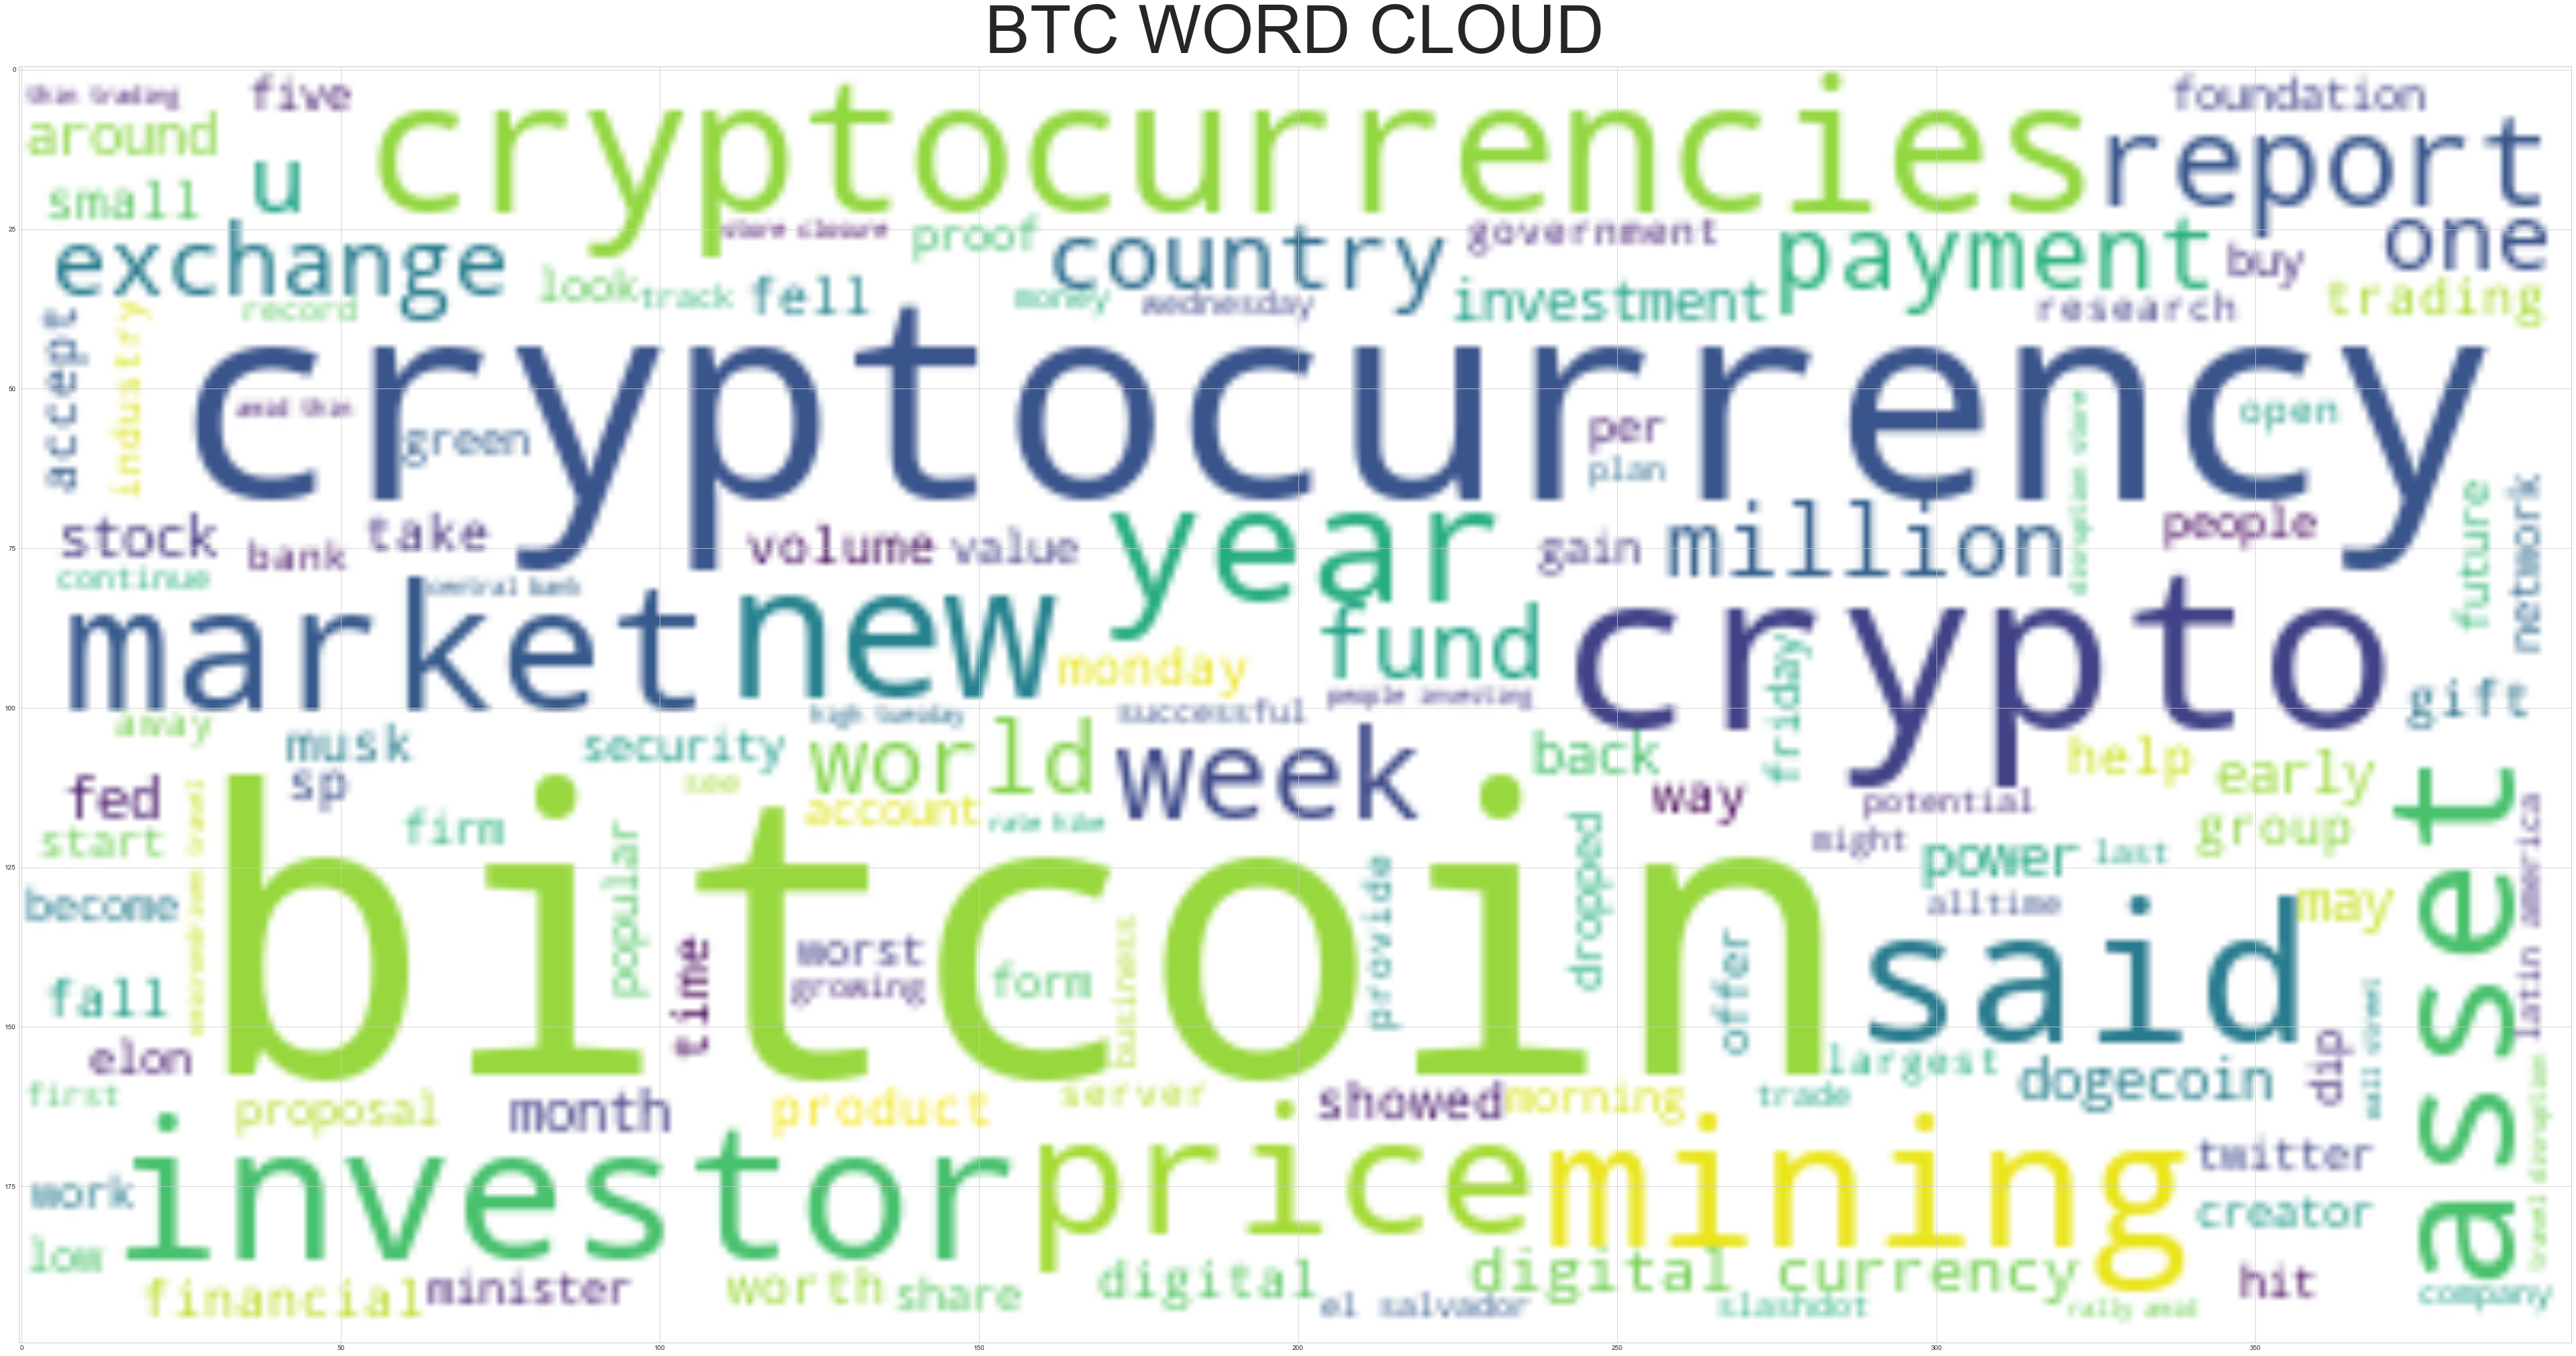

In [40]:
# Generate the Bitcoin word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_btc)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title("BTC WORD CLOUD",fontsize=100)
plt.show()

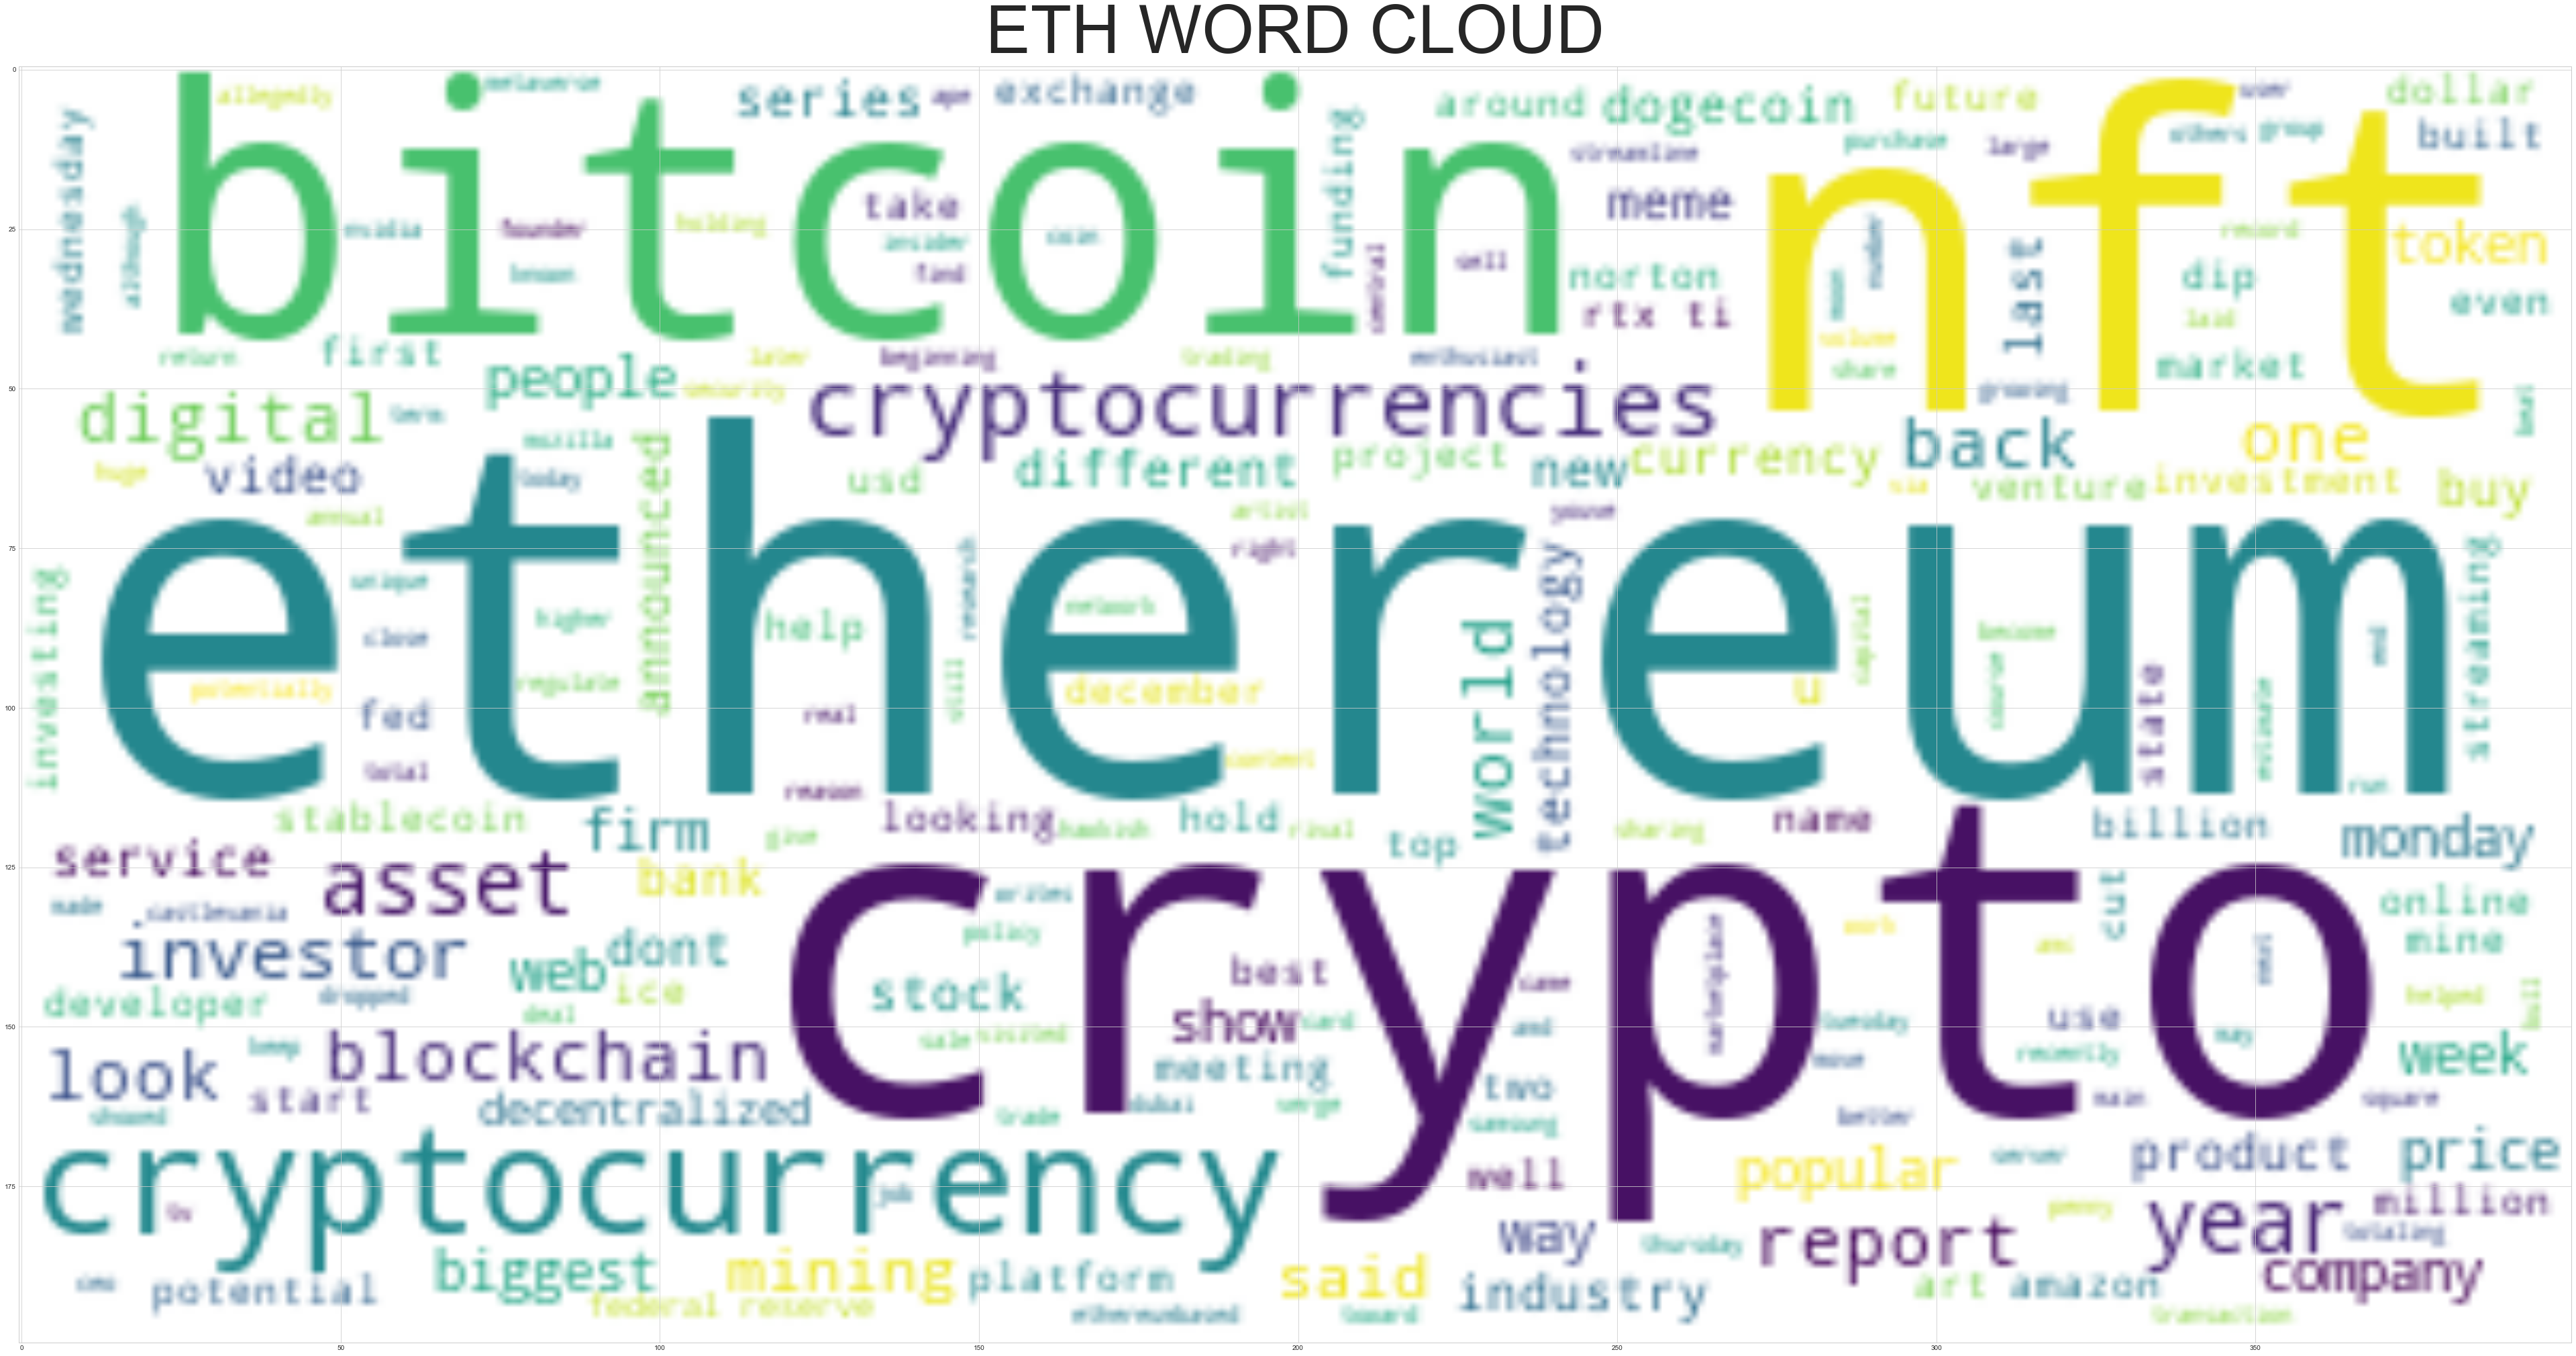

In [41]:
# Generate the Ethereum word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_eth)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title("ETH WORD CLOUD",fontsize=100)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [43]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [44]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [45]:
# Concatenate all of the Bitcoin text together
concat_btc = btc_df['description'].str.cat(sep=', ')

In [46]:
# Run the NER processor on all of the text
doc = nlp(concat_btc)
# Add a title to the document
doc.user_data["title"] = "BTC NER WORD CLOUD"

In [47]:
# Render the visualization
displacy.render(doc, style='ent')

In [48]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in doc.ents])

[('Getty Images', 'ORG'),
 ('Elon Musk', 'PERSON'),
 ('Nick Szabo', 'PERSON'),
 ('Satoshi Nakamoto', 'PERSON'),
 ('Bitcoin', 'PERSON'),
 ('Bitcoin', 'PERSON'),
 ('Asian', 'NORP'),
 ('2', 'CARDINAL'),
 ('Bitcoin', 'PERSON'),
 ('Indian', 'NORP'),
 ('Changpeng', 'PERSON'),
 ('Bloomberg', 'PERSON'),
 ('Getty Images)</td></tr>', 'PERSON'),
 ('Changpeng', 'PERSON'),
 ('The U.S. Securities and Exchange Commission', 'ORG'),
 ('two', 'CARDINAL'),
 ('October', 'DATE'),
 ('Twitter', 'PRODUCT'),
 ('TechCrunch', 'ORG'),
 ('Indian', 'NORP'),
 ("Narendra Modi's", 'PERSON'),
 ('Twitter', 'PRODUCT'),
 ('December 12th', 'DATE'),
 ('Between Bitcoin', 'PERSON'),
 ('NFT', 'ORG'),
 ('this week', 'DATE'),
 ('Sunday', 'DATE'),
 ('above $50,000', 'MONEY'),
 ('6.13%', 'PERCENT'),
 ('47,606.92', 'MONEY'),
 ('Tuesday', 'DATE'),
 ('3,111.19', 'MONEY'),
 ('Friday', 'DATE'),
 ('as much as 5%', 'PERCENT'),
 ('late September', 'DATE'),
 ('41,000', 'MONEY'),
 ('BNN', 'ORG'),
 ('40000', 'MONEY'),
 ('Kitco NEWS', 'ORG'),

---

### Ethereum NER

In [50]:
# Concatenate all of the Ethereum text together
concat_eth = eth_df['description'].str.cat(sep=', ')

In [51]:
# Run the NER processor on all of the text
doc = nlp(concat_eth)
# Add a title to the document
doc.user_data["title"] = "ETH NER WORD CLOUD"

In [52]:
# Render the visualization
displacy.render(doc, style='ent')

In [53]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in doc.ents])

[('Elon Musk', 'PERSON'),
 ('Ethereum', 'GPE'),
 ('418%', 'PERCENT'),
 ('2021', 'DATE'),
 ('AMC Entertainment', 'ORG'),
 ('AMC', 'ORG'),
 ('GME', 'ORG'),
 ('Ethereum', 'ORG'),
 ('more than 650%', 'PERCENT'),
 ('NFT', 'ORG'),
 ('more than $14 billion', 'MONEY'),
 ('2021', 'DATE'),
 ('The Dubai World Trade Centre', 'ORG'),
 ('Dubai', 'GPE'),
 ('Emirate', 'ORG'),
 ('Monday', 'DATE'),
 ('Ethereum Naming Service', 'ORG'),
 ('ENS', 'ORG'),
 ('Skiff', 'ORG'),
 ('Sunday', 'DATE'),
 ('above $50,000', 'MONEY'),
 ('Russian', 'NORP'),
 ('TCS Group Holding', 'ORG'),
 ('L)</a', 'PERSON'),
 ('Wednesday', 'DATE'),
 ('Swiss', 'NORP'),
 ('6.13%', 'PERCENT'),
 ('47,606.92', 'MONEY'),
 ('Tuesday', 'DATE'),
 ('3,111.19', 'MONEY'),
 ('Cryptocurrencies', 'ORG'),
 ('Wednesday', 'DATE'),
 ('Fed', 'ORG'),
 ('Ethereum', 'ORG'),
 ('tran', 'GPE'),
 ('Changpeng', 'PERSON'),
 ('Bloomberg', 'PERSON'),
 ('Getty Images)</td></tr>', 'PERSON'),
 ('Changpeng', 'PERSON'),
 ('ETH', 'ORG'),
 ('ETC', 'ORG'),
 ('two', 'CARDINA

---